Investigate the dynamic population patters of Neighborhood Patterns Plus.

In [151]:
import duckdb
import pandas as pd
from glob import glob
import os
import json
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
import calendar
pd.set_option('display.max_columns', None)

## Generate hourly population from Neighborhood Patterns Plus

In [ ]:
data_dir = r'D:\Data\Advan\dewey-downloads\Neighborhood-Patterns-Plus' # file format: 2019-01-01--data_01bf479c-0106-7ed2-0042-fa07034d0352_105_2_0.snappy.parquet

save_dir = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\neighborhood_patterns_plus_hourly_population'
os.makedirs(save_dir, exist_ok=True)

years = [2022]
months =  list(range(1, 13))


In [154]:
# load the montly data using duckdb

for year in years:
    for month in months:
        print(f'Processing {year}-{month:02}...')
        
        # connect to duckdb
        con = duckdb.connect()

        # create a view for all parquet files in the data directory
        parquet_files = glob(os.path.join(data_dir, f'{year}-{month:02}*.parquet'))
        # multiple processing
        con.execute("PRAGMA threads=16")
        con.execute(f"CREATE VIEW np_plus AS SELECT * FROM read_parquet({parquet_files})")
        raw_df = con.execute("SELECT AREA, POPULARITY_BY_EACH_HOUR, DEVICE_COUNTS, STOP_COUNTS, DATE_RANGE_START, DATE_RANGE_END, YEAR, MONTH FROM np_plus").fetchdf()  #  # Manhattan
        raw_df.sort_values(by=['AREA'], inplace=True)
        # check the row count
        row_count = con.execute("SELECT COUNT(*) FROM np_plus").fetchone()[0]
        print(f'Total rows in np_plus: {row_count}, len(raw_df): {len(raw_df)}')

        print("Processing POPULARITY_BY_EACH_HOUR column...")
        raw_df['POPULARITY_BY_EACH_HOUR'] = raw_df['POPULARITY_BY_EACH_HOUR'].apply(json.loads)

        # generate hourly index columns
        _, last_day = calendar.monthrange(year, month)
        hourly_index = pd.date_range(start=f'{year}-{month:02}-01', end=f'{year}-{month:02}-{last_day} 23:00:00', freq='h')

        arr = np.array(raw_df['POPULARITY_BY_EACH_HOUR'].tolist() )

        # convert to DataFrame
        hourly_df = pd.DataFrame(arr, columns=hourly_index)
        hourly_df['CBG'] = raw_df['AREA'].values
        df = hourly_df[['CBG'] + list(hourly_index)]
        df['CBG'] = df['CBG'].astype(str).str.zfill(12)
        # df.set_index('CBG', inplace=True)
        # save to csv
        output_fname = os.path.join(save_dir, f'CBG_population_hourly_{year}{month:02}.csv')
        df.to_csv(output_fname, index=False)

        # break

raw_df

Processing 2022-01...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 217687, len(raw_df): 217687
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-02...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 217672, len(raw_df): 217672
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-03...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 217702, len(raw_df): 217702
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-04...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 217718, len(raw_df): 217718
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-05...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 218630, len(raw_df): 218630
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-06...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 220677, len(raw_df): 220677
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-07...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 220145, len(raw_df): 220145
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-08...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 220651, len(raw_df): 220651
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-09...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 220659, len(raw_df): 220659
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-10...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 220661, len(raw_df): 220661
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-11...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 220674, len(raw_df): 220674
Processing POPULARITY_BY_EACH_HOUR column...
Processing 2022-12...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total rows in np_plus: 220685, len(raw_df): 220685
Processing POPULARITY_BY_EACH_HOUR column...


,AREA,POPULARITY_BY_EACH_HOUR,DEVICE_COUNTS,STOP_COUNTS,DATE_RANGE_START,DATE_RANGE_END,YEAR,MONTH
182373,010010201001,"[538, 580, 580, 580, 600, 600, 725, 1108, 766,...",50552.0,176572.0,2022-12-01,2023-01-01,2022.0,12.0
107219,010010201002,"[1315, 1398, 1398, 1398, 1388, 1367, 1294, 101...",13166.0,102338.0,2022-12-01,2023-01-01,2022.0,12.0
71219,010010202001,"[631, 662, 662, 662, 694, 652, 776, 2092, 1284...",21671.0,130401.0,2022-12-01,2023-01-01,2022.0,12.0
89537,010010202002,"[745, 787, 839, 818, 859, 880, 1015, 2745, 240...",124838.0,597363.0,2022-12-01,2023-01-01,2022.0,12.0
139435,010010203001,"[2392, 2517, 2527, 2579, 2538, 2496, 2392, 235...",35200.0,240706.0,2022-12-01,2023-01-01,2022.0,12.0
...,...,...,...,...,...,...,...,...
183663,780309611001,"[414, 466, 476, 476, 445, 455, 476, 1035, 1232...",48077.0,230927.0,2022-12-01,2023-01-01,2022.0,12.0
190758,780309611002,"[238, 258, 290, 279, 300, 310, 310, 466, 404, ...",21640.0,122756.0,2022-12-01,2023-01-01,2022.0,12.0
190754,780309612001,"[269, 300, 321, 341, 341, 352, 341, 258, 217, ...",4692.0,32973.0,2022-12-01,2023-01-01,2022.0,12.0
64709,780309612002,"[124, 145, 145, 145, 155, 155, 155, 279, 372, ...",33574.0,116789.0,2022-12-01,2023-01-01,2022.0,12.0


In [ ]:
data_dir = r'D:\Data\Advan\dewey-downloads\Neighborhood-Patterns-Plus' # file format: 2019-01-01--data_01bf479c-0106-7ed2-0042-fa07034d0352_105_2_0.snappy.parquet

save_dir = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\neighborhood_patterns_plus_figures'
os.makedirs(save_dir, exist_ok=True)

year = 2022
months =  list(range(1, 13))
 

landscan_daytime_fname =   r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\Landscan_daytime_2021_CBG.csv"
landscan_nighttime_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\Landscan_nighttime_2021_CBG.csv"

 
ACS_file = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
CBG_place_fname = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\CBG_place.gpkg'
 

CBG_2019_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\blockgroups2019.zip"


landscan_day_df = pd.read_csv(landscan_daytime_fname, dtype={"GEOID":str}, usecols=['GEOID', 'SUM']).rename(columns={"SUM": "landscan_day", "GEOID":"CBG"}).set_index("CBG").astype(int)
landscan_night_df = pd.read_csv(landscan_nighttime_fname, dtype={"GEOID":str}, usecols=['GEOID', 'SUM']).rename(columns={"SUM": "landscan_night", "GEOID":"CBG"}).set_index("CBG").astype(int)

ACS_df = pd.read_csv(ACS_file, dtype={'fips':str}).iloc[:, :2].rename(columns={"fips": "CBG"}).set_index("CBG").astype(int)
ACS_df = ACS_df.merge(landscan_day_df, left_index=True, right_index=True).merge(landscan_night_df, left_index=True, right_index=True)
ACS_df

,totalpopulation,landscan_day,landscan_night
CBG,,,
010010201001,730,392,580
010010201002,1263,436,1194
010010202001,835,1622,904
010010202002,1124,2566,1116
010010203001,2774,974,2254
...,...,...,...
560459511001,1450,951,1408
560459511002,1844,956,1798
560459513001,1314,803,1041


In [80]:
CBG_place_gdf = gpd.read_file(CBG_place_fname)
CBG_place_gdf

,sub_area_ratio,CBG,place,NAME,NAMELSAD,STUSPS,STATE_NAME,geometry
0,0.991480,010730059033,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.69174 33.60098, -86.69159 ..."
1,0.953754,010730059031,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.68297 33.59476, -86.68294 ..."
2,0.945075,010730059053,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.70047 33.61792, -86.70042 ..."
3,1.000000,010730059051,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.71176 33.59397, -86.71124 ..."
4,1.000000,010730057023,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.88307 33.47244, -86.88301 ..."
...,...,...,...,...,...,...,...,...
147916,0.938016,720133001023,7203024,Animas,Animas comunidad,PR,Puerto Rico,"MULTIPOLYGON (((-66.63968 18.44907, -66.63827 ..."
147917,0.623047,720133001024,7203024,Animas,Animas comunidad,PR,Puerto Rico,"MULTIPOLYGON (((-66.64058 18.44481, -66.63923 ..."
147918,0.959056,720959514003,7226502,Emajagua,Emajagua comunidad,PR,Puerto Rico,"MULTIPOLYGON (((-65.8927 17.99878, -65.8925 17..."
147919,0.968009,720959514005,7226502,Emajagua,Emajagua comunidad,PR,Puerto Rico,"MULTIPOLYGON (((-65.88323 18.005, -65.88257 18..."


In [97]:
con = duckdb.connect()

# create a view for all parquet files in the data directory
parquet_files = glob(os.path.join(data_dir, f'{year}-*.parquet'))
# multiple processing
con.execute("PRAGMA threads=16")
con.execute(f"CREATE VIEW np_plus AS SELECT * FROM read_parquet({parquet_files})")

# check the row count
row_count = con.execute("SELECT COUNT(*) FROM np_plus").fetchone()[0]
print(f'Total rows in np_plus: {row_count}')

# show data schema
df = con.execute("SELECT * FROM np_plus LIMIT 5").fetchdf()
df

Total rows in np_plus: 2633561


,AFTERNOON_TEA_DEVICE_HOME_AREAS,AREA,AREA_TYPE,BREAKFAST_DEVICE_HOME_AREAS,DATE_RANGE_END,DATE_RANGE_START,DAY_COUNTS,DEVICE_COUNTS,DEVICE_DAYTIME_AREAS,DEVICE_HOME_AREAS,DEVICE_TYPE,DINNER_DEVICE_HOME_AREAS,DISTANCE_FROM_HOME,DISTANCE_FROM_PRIMARY_DAYTIME_LOCATION,ISO_COUNTRY_CODE,LUNCH_DEVICE_HOME_AREAS,MEDIAN_DWELL,MONTH,NIGHTLIFE_DEVICE_HOME_AREAS,ORIGIN_AREA_TYPE,POPULARITY_BY_EACH_HOUR,POPULARITY_BY_HOUR_FRIDAY,POPULARITY_BY_HOUR_MONDAY,POPULARITY_BY_HOUR_SATURDAY,POPULARITY_BY_HOUR_SUNDAY,POPULARITY_BY_HOUR_THURSDAY,POPULARITY_BY_HOUR_TUESDAY,POPULARITY_BY_HOUR_WEDNESDAY,REGION,STOPS_BY_DAY,STOPS_BY_EACH_HOUR,STOP_COUNTS,TOP_SAME_DAY_BRAND,TOP_SAME_MONTH_BRAND,WEEKDAY_DEVICE_HOME_AREAS,WEEKEND_DEVICE_HOME_AREAS,WORK_BEHAVIOR_DEVICE_HOME_AREAS,WORK_HOURS_DEVICE_HOME_AREAS,YEAR
0,"{""040134202082"":1274,""040134207061"":197,""04013...",040134202082,Census Block Group,"{""040134202082"":1244,""040134202131"":349,""04013...",2022-02-01,2022-01-01,"{""Monday"":5,""Tuesday"":4,""Wednesday"":4,""Thursda...",34694.0,"{""040134202082"":1016,""040134201042"":834,""04013...","{""040134202082"":1426,""040134202131"":743,""04013...","{""android"":19305,""ios"":15556}","{""040134202082"":1335,""040134207082"":349,""04013...",37.0,3099.0,US,"{""040134202082"":1305,""040134202131"":424,""04013...",78.066667,1.0,"{""040134202082"":895,""040134207061"":60,""0401342...",Census Block Group,"[1138,1107,1062,1077,1047,1077,1062,1047,1001,...","[3627,3870,3961,3946,3930,3991,4158,3976,3232,...","[4613,4704,4856,4856,4841,4871,4993,5038,4537,...","[4932,5114,5084,5099,5099,5114,5175,5084,5403,...","[4993,5038,5069,5038,5099,5251,5418,5342,5934,...","[3475,3642,3703,3718,3688,3839,3854,3521,3384,...","[3718,3824,3870,3854,3794,3839,3870,3794,3369,...","[3688,3839,3930,3854,3779,3763,3688,3763,3293,...",AZ,"[3703,3566,4067,3505,4113,4128,3870,4598,4204,...","[166,75,30,30,0,45,15,15,0,30,212,227,303,182,...",129552.0,"{""Walmart"":13,""Goodwill Industries"":11,""Fry's ...","{""Walmart"":57,""Fry's Food & Drug Stores"":38,""S...","{""040134202082"":1381,""040134207061"":622,""04013...","{""040134202082"":1381,""040134202131"":364,""04013...","{""040134202082"":1092,""040134226393"":30,""040136...","{""040134202082"":1320,""040134202131"":500,""04013...",2022.0
1,"{""040190040621"":4704,""040190040641"":3885,""0401...",040190040621,Census Block Group,"{""040190040621"":4629,""040190040641"":3991,""0401...",2022-02-01,2022-01-01,"{""Monday"":5,""Tuesday"":4,""Wednesday"":4,""Thursda...",81501.0,"{""040190040621"":7709,""040190040641"":4188,""0401...","{""040190040641"":5372,""040190040621"":5296,""0401...","{""android"":43345,""ios"":38413}","{""040190040621"":4902,""040190040641"":3915,""0401...",7027.0,5543.0,US,"{""040190040621"":4704,""040190040641"":4386,""0401...",48.966667,1.0,"{""040190040621"":2322,""040190040641"":424,""04019...",Census Block Group,"[5524,5433,5539,5524,5509,5433,5433,5478,5585,...","[20944,21460,21506,21642,21885,22340,22947,279...","[25998,26818,27060,27076,27045,27531,28548,380...","[26059,26590,26893,27000,26909,26802,27030,274...","[25315,25846,26302,26393,26317,26605,26909,273...","[20018,20762,21081,21248,21308,21597,21885,314...","[20990,21323,21445,21323,21733,22173,22325,314...","[21050,21839,21991,21976,22067,22264,22507,315...",AZ,"[16285,17969,45000,46806,43543,45652,45531,248...","[591,258,258,121,45,30,91,212,409,516,713,880,...",1120347.0,"{""Safeway"":21,""Walmart"":17,""Fry's Food & Drug ...","{""Walmart"":48,""Safeway"":35,""Fry's Food & Drug ...","{""040190040621"":5266,""040190040641"":5069,""0401...","{""040190040621"":4932,""040190040641"":4295,""0401...","{""040190040621"":4386,""040190040641"":834,""04019...","{""040190040621"":5069,""040190040641"":4765,""0401...",2022.0
2,"{""040130405171"":531,""040130405242"":379,""040130...",040130405242,Census Block Group,"{""040130405242"":333,""040130405171"":166,""040136...",2022-02-01,2022-01-01,"{""Monday"":5,""Tuesday"":4,""Wednesday"":4,""Thursda..."

In [105]:
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['CBG'].str.startswith('36061')]  # Manhattan 

# extract data for a specific area (e.g., Manhattan, FIPS code 36061)
raw_df = con.execute("SELECT AREA, POPULARITY_BY_EACH_HOUR, DEVICE_COUNTS, STOP_COUNTS, DATE_RANGE_START, DATE_RANGE_END, YEAR, MONTH FROM np_plus WHERE AREA LIKE '36061%'").fetchdf()  #  # Manhattan
import json
raw_df['POPULARITY_BY_EACH_HOUR'] = raw_df['POPULARITY_BY_EACH_HOUR'].apply(json.loads)
start_date = pd.to_datetime(raw_df['DATE_RANGE_START'].min())
end_date = pd.to_datetime(raw_df['DATE_RANGE_END'].max())
raw_df

,AREA,POPULARITY_BY_EACH_HOUR,DEVICE_COUNTS,STOP_COUNTS,DATE_RANGE_START,DATE_RANGE_END,YEAR,MONTH
0,360610136006,"[273, 303, 318, 349, 349, 364, 364, 364, 364, ...",8787.0,32281.0,2022-01-01,2022-02-01,2022.0,1.0
1,360610152005,"[121, 166, 166, 166, 182, 182, 182, 166, 166, ...",12490.0,27288.0,2022-01-01,2022-02-01,2022.0,1.0
2,360610219004,"[136, 166, 151, 151, 121, 121, 106, 136, 121, ...",7861.0,23190.0,2022-01-01,2022-02-01,2022.0,1.0
3,360610018003,"[470, 667, 591, 424, 303, 242, 182, 212, 197, ...",91199.0,173641.0,2022-01-01,2022-02-01,2022.0,1.0
4,360610129001,"[1138, 1123, 986, 849, 682, 576, 607, 622, 591...",86843.0,186238.0,2022-01-01,2022-02-01,2022.0,1.0
...,...,...,...,...,...,...,...,...
14030,360610097004,"[238, 238, 238, 227, 227, 238, 227, 227, 258, ...",36319.0,52427.0,2022-12-01,2023-01-01,2022.0,12.0
14031,360610091001,"[963, 1046, 1056, 1056, 1077, 1066, 1118, 1346...",165011.0,344712.0,2022-12-01,2023-01-01,2022.0,12.0
14032,360610235013,"[176, 207, 207, 207, 207, 227, 207, 186, 186, ...",5210.0,16823.0,2022-12-01,2023-01-01,2022.0,12.0
14033,360610211006,"[196, 217, 217, 217, 217, 238, 248, 279, 238, ...",9085.0,22127.0,2022-12-01,2023-01-01,2022.0,12.0


In [107]:
hourly_index = pd.date_range(start=start_date, end=end_date, freq='H')[:-1]
hourly_index

C:\tmp\ipykernel_62432\2913266659.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start=start_date, end=end_date, freq='H')[:-1]


DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-31 14:00:00', '2022-12-31 15:00:00',
               '2022-12-31 16:00:00', '2022-12-31 17:00:00',
               '2022-12-31 18:00:00', '2022-12-31 19:00:00',
               '2022-12-31 20:00:00', '2022-12-31 21:00:00',
               '2022-12-31 22:00:00', '2022-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='h')

In [115]:
l = raw_df['POPULARITY_BY_EACH_HOUR'].tolist() 
l.shape

AttributeError: 'list' object has no attribute 'shape'

In [143]:
len(raw_df.iloc[1169]['POPULARITY_BY_EACH_HOUR'])

672

In [144]:
raw_df['hour_cnt'] = raw_df['POPULARITY_BY_EACH_HOUR'].apply(len)
raw_df['hour_cnt'].value_counts().sort_index()

hour_cnt
672    1169
720    4679
744    8187
Name: count, dtype: int64

In [ ]:
raw_df['POPULARITY_BY_EACH_HOUR']

In [141]:
np.array(raw_df.iloc[:1169]['POPULARITY_BY_EACH_HOUR'].tolist() )

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1169,) + inhomogeneous part.

In [109]:
# create a DataFrame with hourly index
import numpy as np

# expand the POPULARITY_BY_EACH_HOUR into separate columns
arr = np.array(raw_df['POPULARITY_BY_EACH_HOUR'].tolist() )

# convert to DataFrame
hourly_df = pd.DataFrame(arr, columns=hourly_index)
hourly_df['CBG'] = raw_df['AREA'].values
df = hourly_df[['CBG'] + list(hourly_index)]
df['CBG'] = df['CBG'].astype(str).str.zfill(12)
df.set_index('CBG', inplace=True)
df
# arr

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (14035,) + inhomogeneous part.

In [92]:

CBG_place_hourly_gdf = CBG_place_gdf.merge(ACS_df, right_index=True,  left_on='CBG').merge(df, right_index=True, left_on='CBG')
CBG_place_hourly_gdf

,sub_area_ratio,CBG,place,NAME,NAMELSAD,STUSPS,STATE_NAME,geometry,totalpopulation,landscan_day,landscan_night,2022-01-01 00:00:00,2022-01-01 01:00:00,2022-01-01 02:00:00,2022-01-01 03:00:00,2022-01-01 04:00:00,2022-01-01 05:00:00,2022-01-01 06:00:00,2022-01-01 07:00:00,2022-01-01 08:00:00,2022-01-01 09:00:00,2022-01-01 10:00:00,2022-01-01 11:00:00,2022-01-01 12:00:00,2022-01-01 13:00:00,2022-01-01 14:00:00,2022-01-01 15:00:00,2022-01-01 16:00:00,2022-01-01 17:00:00,2022-01-01 18:00:00,2022-01-01 19:00:00,2022-01-01 20:00:00,2022-01-01 21:00:00,2022-01-01 22:00:00,2022-01-01 23:00:00,2022-01-02 00:00:00,2022-01-02 01:00:00,2022-01-02 02:00:00,2022-01-02 03:00:00,2022-01-02 04:00:00,2022-01-02 05:00:00,2022-01-02 06:00:00,2022-01-02 07:00:00,2022-01-02 08:00:00,2022-01-02 09:00:00,2022-01-02 10:00:00,2022-01-02 11:00:00,2022-01-02 12:00:00,2022-01-02 13:00:00,2022-01-02 14:00:00,2022-01-02 15:00:00,2022-01-02 16:00:00,2022-01-02 17:00:00,2022-01-02 18:00:00,2022-01-02 19:00:00,2022-01-02 20:00:00,2022-01-02 21:00:00,2022-01-02 22:00:00,2022-01-02 23:00:00,2022-01-03 00:00:00,2022-01-03 01:00:00,2022-01-03 02:00:00,2022-01-03 03:00:00,2022-01-03 04:00:00,2022-01-03 05:00:00,2022-01-03 06:00:00,2022-01-03 07:00:00,2022-01-03 08:00:00,2022-01-03 09:00:00,2022-01-03 10:00:00,2022-01-03 11:00:00,2022-01-03 12:00:00,2022-01-03 13:00:00,2022-01-03 14:00:00,2022-01-03 15:00:00,2022-01-03 16:00:00,2022-01-03 17:00:00,2022-01-03 18:00:00,2022-01-03 19:00:00,2022-01-03 20:00:00,2022-01-03 21:00:00,2022-01-03 22:00:00,2022-01-03 23:00:00,2022-01-04 00:00:00,2022-01-04 01:00:00,2022-01-04 02:00:00,2022-01-04 03:00:00,2022-01-04 04:00:00,2022-01-04 05:00:00,2022-01-04 06:00:00,2022-01-04 07:00:00,2022-01-04 08:00:00,2022-01-04 09:00:00,2022-01-04 10:00:00,2022-01-04 11:00:00,2022-01-04 12:00:00,2022-01-04 13:00:00,2022-01-04 14:00:00,2022-01-04 15:00:00,2022-01-04 16:00:00,2022-01-04 17:00:00,2022-01-04 18:00:00,2022-01-04 19:00:00,2022-01-04 20:00:00,2022-01-04 21:00:00,2022-01-04 22:00:00,2022-01-04 23:00:00,2022-01-05 00:00:00,2022-01-05 01:00:00,2022-01-05 02:00:00,2022-01-05 03:00:00,2022-01-05 04:00:00,2022-01-05 05:00:00,2022-01-05 06:00:00,2022-01-05 07:00:00,2022-01-05 08:00:00,2022-01-05 09:00:00,2022-01-05 10:00:00,2022-01-05 11:00:00,2022-01-05 12:00:00,2022-01-05 13:00:00,2022-01-05 14:00:00,2022-01-05 15:00:00,2022-01-05 16:00:00,2022-01-05 17:00:00,2022-01-05 18:00:00,2022-01-05 19:00:00,2022-01-05 20:00:00,2022-01-05 21:00:00,2022-01-05 22:00:00,2022-01-05 23:00:00,2022-01-06 00:00:00,2022-01-06 01:00:00,2022-01-06 02:00:00,2022-01-06 03:00:00,2022-01-06 04:00:00,2022-01-06 05:00:00,2022-01-06 06:00:00,2022-01-06 07:00:00,2022-01-06 08:00:00,2022-01-06 09:00:00,2022-01-06 10:00:00,2022-01-06 11:00:00,2022-01-06 12:00:00,2022-01-06 13:00:00,2022-01-06 14:00:00,2022-01-06 15:00:00,2022-01-06 16:00:00,2022-01-06 17:00:00,2022-01-06 18:00:00,2022-01-06 19:00:00,2022-01-06 20:00:00,2022-01-06 21:00:00,2022-01-06 22:00:00,2022-01-06 23:00:00,2022-01-07 00:00:00,2022-01-07 01:00:00,2022-01-07 02:00:00,2022-01-07 03:00:00,2022-01-07 04:00:00,2022-01-07 05:00:00,2022-01-07 06:00:00,2022-01-07 07:00:00,2022-01-07 08:00:00,2022-01-07 09:00:00,2022-01-07 10:00:00,2022-01-07 11:00:00,2022-01-07 12:00:00,2022-01-07 13:00:00,2022-01-07 14:00:00,2022-01-07 15:00:00,2022-01-07 16:00:00,2022-01-07 17:00:00,2022-01-07 18:00:00,2022-01-07 19:00:00,2022-01-07 20:00:00,2022-01-07 21:00:00,2022-01-07 22:00:00,2022-01-07 23:00:00,2022-01-08 00:00:00,2022-01-08 01:00:00,2022-01-08 02:00:00,2022-01-08 03:00:00,2022-01-08 04:00:00,2022-01-08 05:00:00,2022-01-08 06:00:00,2022-01-08 07:00:00,2022-01-08 08:00:00,2022-01-08 09:00:00,2022-01-08 10:00:00,2022-01-08 11:00:00,2022-01-08 12:00:00,2022-01-08 13:00:00,2022-01-08 14:00:00,2022-01-08 15:00:00,2022-01-08 16:00:00,2022-01-08 17:00:00,2022-01-08 18:00:00,2022-01-08 19:00:00,2022-01-08 20:00:00,2022-01-08 21:00:00,2022-01-08 22:00:00,2022-01-08 23:00:00,2022-01-09 00:00:00,2022-01-09 01:00:00,2022-01-0

In [93]:
# df = CBG_place_hourly_gdf.query('NAME == "Myrtle Beach" ')
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Georgetown city"  and STUSPS == "SC"')
# df = CBG_place_hourly_gdf.query('NAME == "Ocean City" and STUSPS == "MD" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Miami Beach city')]
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Miami Beach city" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Daytona Beach city')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Port Aransas')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Capitola')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('St. Augustine')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Cape May')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('San Clemente')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Newport')].query('STATE_NAME == "Rhode Island" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Solana Beach')] 
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Provincetown')]#.query('STATE_NAME == "Rhode Island" ')
# df = CBG_place_hourly_gdf.query('NAME == "State College" ')
# df = CBG_place_hourly_gdf.query('NAME == "Columbia" ').query('STUSPS == "SC" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Holden Beach town')]
df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['CBG'].str.startswith('36061')]  # Manhattan 
# df = CBG_place_hourly_gdf.query('NAME == "Mesa" ')
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Tracy city" and STUSPS == "CA" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Commerce city" and STUSPS == "CA" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Havelock city" and STUSPS == "NC" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Benson town" and STUSPS == "NC" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Belzoni city" and STUSPS == "MS" ')  # Catfish Festival Celebrates Mississippi’s Aquacultural History
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Holden Beach town" and STUSPS == "NC" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Carnation city" and STUSPS == "WA" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Sammamish city" and STUSPS == "WA" ') 
df

,sub_area_ratio,CBG,place,NAME,NAMELSAD,STUSPS,STATE_NAME,geometry,totalpopulation,landscan_day,landscan_night,2022-01-01 00:00:00,2022-01-01 01:00:00,2022-01-01 02:00:00,2022-01-01 03:00:00,2022-01-01 04:00:00,2022-01-01 05:00:00,2022-01-01 06:00:00,2022-01-01 07:00:00,2022-01-01 08:00:00,2022-01-01 09:00:00,2022-01-01 10:00:00,2022-01-01 11:00:00,2022-01-01 12:00:00,2022-01-01 13:00:00,2022-01-01 14:00:00,2022-01-01 15:00:00,2022-01-01 16:00:00,2022-01-01 17:00:00,2022-01-01 18:00:00,2022-01-01 19:00:00,2022-01-01 20:00:00,2022-01-01 21:00:00,2022-01-01 22:00:00,2022-01-01 23:00:00,2022-01-02 00:00:00,2022-01-02 01:00:00,2022-01-02 02:00:00,2022-01-02 03:00:00,2022-01-02 04:00:00,2022-01-02 05:00:00,2022-01-02 06:00:00,2022-01-02 07:00:00,2022-01-02 08:00:00,2022-01-02 09:00:00,2022-01-02 10:00:00,2022-01-02 11:00:00,2022-01-02 12:00:00,2022-01-02 13:00:00,2022-01-02 14:00:00,2022-01-02 15:00:00,2022-01-02 16:00:00,2022-01-02 17:00:00,2022-01-02 18:00:00,2022-01-02 19:00:00,2022-01-02 20:00:00,2022-01-02 21:00:00,2022-01-02 22:00:00,2022-01-02 23:00:00,2022-01-03 00:00:00,2022-01-03 01:00:00,2022-01-03 02:00:00,2022-01-03 03:00:00,2022-01-03 04:00:00,2022-01-03 05:00:00,2022-01-03 06:00:00,2022-01-03 07:00:00,2022-01-03 08:00:00,2022-01-03 09:00:00,2022-01-03 10:00:00,2022-01-03 11:00:00,2022-01-03 12:00:00,2022-01-03 13:00:00,2022-01-03 14:00:00,2022-01-03 15:00:00,2022-01-03 16:00:00,2022-01-03 17:00:00,2022-01-03 18:00:00,2022-01-03 19:00:00,2022-01-03 20:00:00,2022-01-03 21:00:00,2022-01-03 22:00:00,2022-01-03 23:00:00,2022-01-04 00:00:00,2022-01-04 01:00:00,2022-01-04 02:00:00,2022-01-04 03:00:00,2022-01-04 04:00:00,2022-01-04 05:00:00,2022-01-04 06:00:00,2022-01-04 07:00:00,2022-01-04 08:00:00,2022-01-04 09:00:00,2022-01-04 10:00:00,2022-01-04 11:00:00,2022-01-04 12:00:00,2022-01-04 13:00:00,2022-01-04 14:00:00,2022-01-04 15:00:00,2022-01-04 16:00:00,2022-01-04 17:00:00,2022-01-04 18:00:00,2022-01-04 19:00:00,2022-01-04 20:00:00,2022-01-04 21:00:00,2022-01-04 22:00:00,2022-01-04 23:00:00,2022-01-05 00:00:00,2022-01-05 01:00:00,2022-01-05 02:00:00,2022-01-05 03:00:00,2022-01-05 04:00:00,2022-01-05 05:00:00,2022-01-05 06:00:00,2022-01-05 07:00:00,2022-01-05 08:00:00,2022-01-05 09:00:00,2022-01-05 10:00:00,2022-01-05 11:00:00,2022-01-05 12:00:00,2022-01-05 13:00:00,2022-01-05 14:00:00,2022-01-05 15:00:00,2022-01-05 16:00:00,2022-01-05 17:00:00,2022-01-05 18:00:00,2022-01-05 19:00:00,2022-01-05 20:00:00,2022-01-05 21:00:00,2022-01-05 22:00:00,2022-01-05 23:00:00,2022-01-06 00:00:00,2022-01-06 01:00:00,2022-01-06 02:00:00,2022-01-06 03:00:00,2022-01-06 04:00:00,2022-01-06 05:00:00,2022-01-06 06:00:00,2022-01-06 07:00:00,2022-01-06 08:00:00,2022-01-06 09:00:00,2022-01-06 10:00:00,2022-01-06 11:00:00,2022-01-06 12:00:00,2022-01-06 13:00:00,2022-01-06 14:00:00,2022-01-06 15:00:00,2022-01-06 16:00:00,2022-01-06 17:00:00,2022-01-06 18:00:00,2022-01-06 19:00:00,2022-01-06 20:00:00,2022-01-06 21:00:00,2022-01-06 22:00:00,2022-01-06 23:00:00,2022-01-07 00:00:00,2022-01-07 01:00:00,2022-01-07 02:00:00,2022-01-07 03:00:00,2022-01-07 04:00:00,2022-01-07 05:00:00,2022-01-07 06:00:00,2022-01-07 07:00:00,2022-01-07 08:00:00,2022-01-07 09:00:00,2022-01-07 10:00:00,2022-01-07 11:00:00,2022-01-07 12:00:00,2022-01-07 13:00:00,2022-01-07 14:00:00,2022-01-07 15:00:00,2022-01-07 16:00:00,2022-01-07 17:00:00,2022-01-07 18:00:00,2022-01-07 19:00:00,2022-01-07 20:00:00,2022-01-07 21:00:00,2022-01-07 22:00:00,2022-01-07 23:00:00,2022-01-08 00:00:00,2022-01-08 01:00:00,2022-01-08 02:00:00,2022-01-08 03:00:00,2022-01-08 04:00:00,2022-01-08 05:00:00,2022-01-08 06:00:00,2022-01-08 07:00:00,2022-01-08 08:00:00,2022-01-08 09:00:00,2022-01-08 10:00:00,2022-01-08 11:00:00,2022-01-08 12:00:00,2022-01-08 13:00:00,2022-01-08 14:00:00,2022-01-08 15:00:00,2022-01-08 16:00:00,2022-01-08 17:00:00,2022-01-08 18:00:00,2022-01-08 19:00:00,2022-01-08 20:00:00,2022-01-08 21:00:00,2022-01-08 22:00:00,2022-01-08 23:00:00,2022-01-09 00:00:00,2022-01-09 01:00:00,2022-01-0

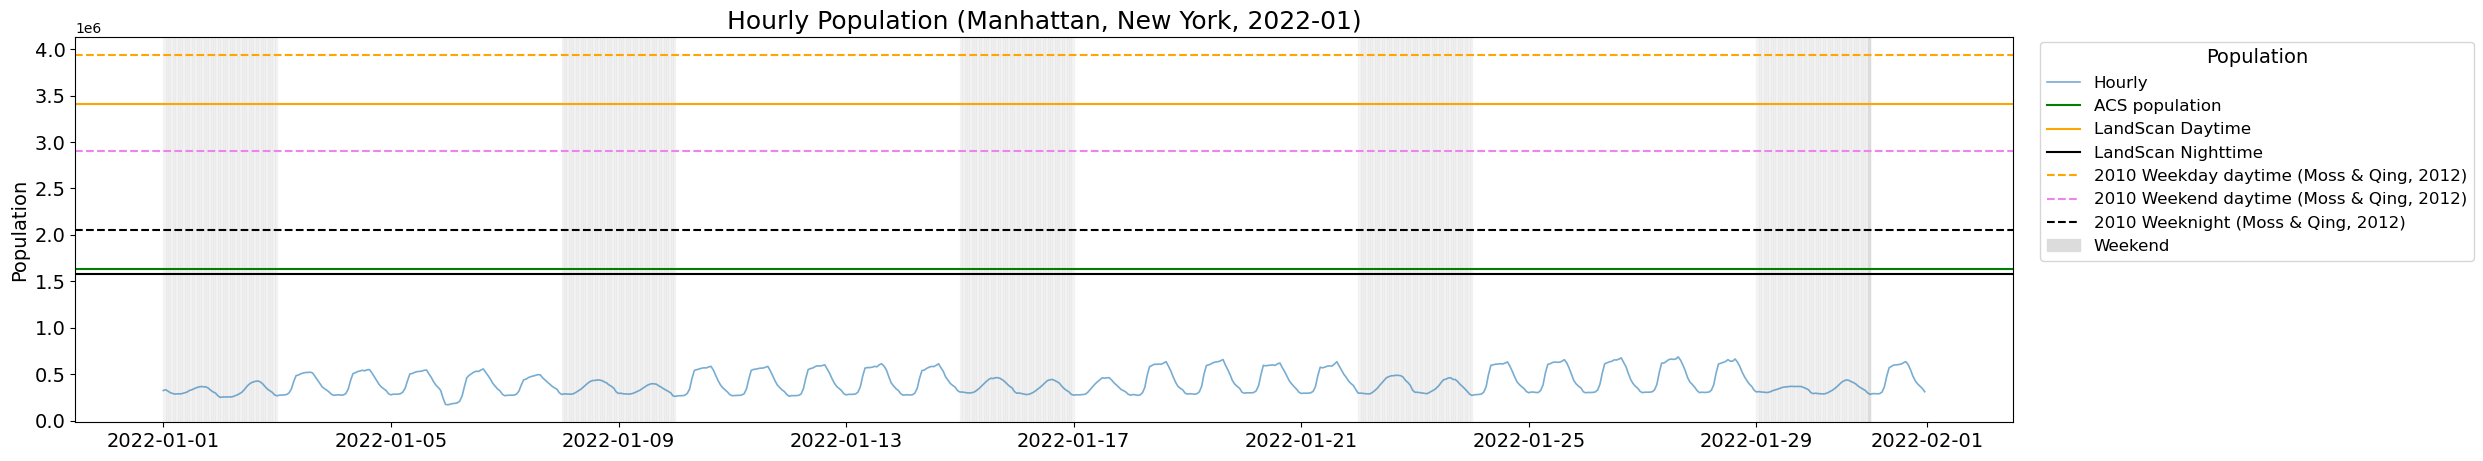

UnboundLocalError: cannot access local variable 'start' where it is not associated with a value

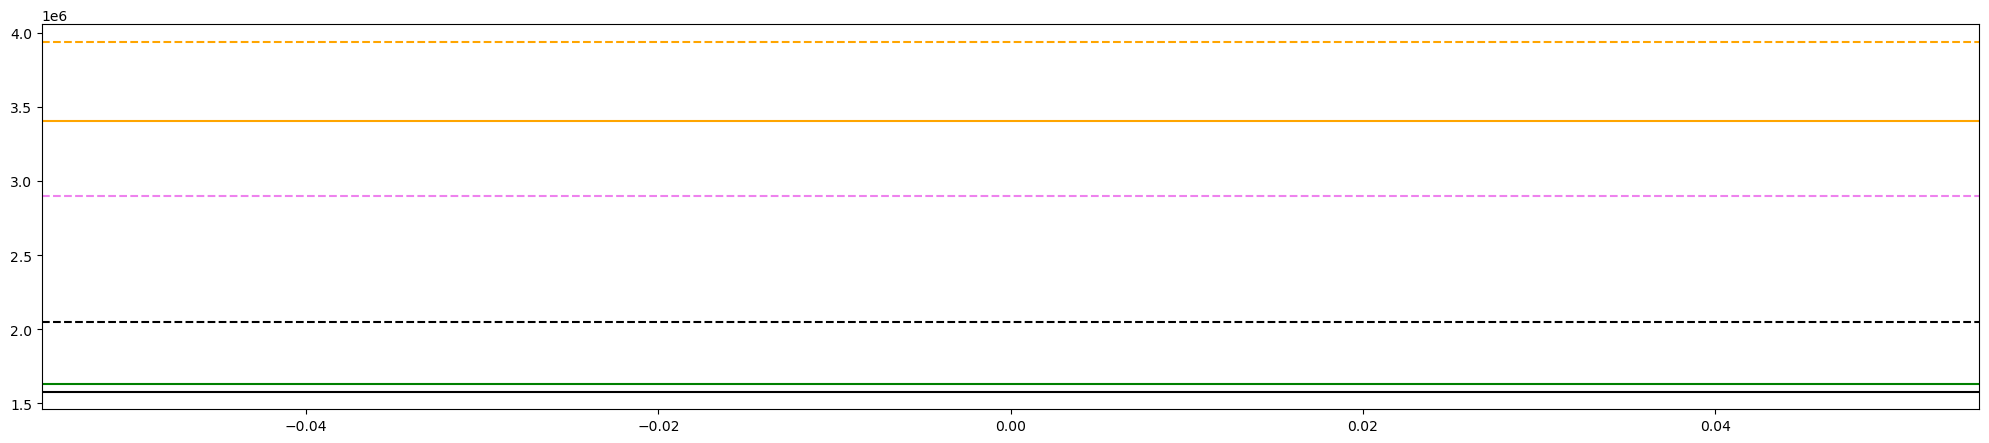

In [95]:
import matplotlib.pyplot as plt
import calendar

def plot_population(df):
    fig, ax = plt.subplots(figsize = (25, 5))
    sum_series = df.iloc[:, 8:].sum()

    ACS_popu = sum_series.iloc[0]
    LandScan_day_popu = sum_series.iloc[1]
    LandScan_night_popu = sum_series.iloc[2]

    place_name = '_'.join(df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list())

    mini_popu_ratio = 0.1
    sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)

    plt.plot(sum_series.iloc[3:], label="Hourly", alpha=0.6, linewidth=1.2)
    # plt.plot(sum_series.iloc[3:].rolling(window=24, min_periods=1).mean(), label="Daily (mean of 24-hour)", color='blue', alpha=1)  # rolling 24 hours

    plt.axhline(y=ACS_popu, color = 'green', linestyle = '-', label="ACS population") 
    plt.axhline(y=LandScan_day_popu, color = 'orange', linestyle = '-', label="LandScan Daytime") 
    plt.axhline(y=LandScan_night_popu, color = 'black', linestyle = '-', label="LandScan Nighttime") 
    
    plt.axhline(y=3.94e6, color = 'orange', linestyle = '--', label="2010 Weekday daytime (Moss & Qing, 2012)") 
    plt.axhline(y=2.90e6, color = 'violet', linestyle = '--', label="2010 Weekend daytime (Moss & Qing, 2012)") 
    plt.axhline(y=2.05e6, color = 'black', linestyle = '--', label="2010 Weeknight (Moss & Qing, 2012)") 
    

    # grey weekends
    _, last_day = calendar.monthrange(year, months[-1])
    # hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')
    # hourly_index = pd.date_range(start=f'{year}-06-01', end=f'{year}-07-{last_day} 23:00:00', freq='H')  # July
    hourly_index = df.columns[11:]
    hourly_index = pd.to_datetime(hourly_index)
    for start in hourly_index[hourly_index.weekday >= 5]:
        plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=0.25)
        # ChatGPT make 'hours' as 'days', wrong! Hard to find!
    plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=1, label='Weekend')
    
    
    
    # plt.title(df.iloc[0]['NAMELSAD'] + ", " + df.iloc[0]['STATE_NAME'], fontsize=18)
    
    plt.title(f"Hourly Population (Manhattan, New York, {year}-{_month:02})", fontsize=18)
    
    plt.ylabel('Population', fontsize=14)
    plt.legend(title='Population', fontsize=14, title_fontsize=14)
    
    
    # plt.legend(title='Population', fontsize=14)
    plt.legend(title='Population', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.01, 1.01), loc='upper left')
    
    plt.tick_params(axis='x', which='both', labelsize=14)
    plt.tick_params(axis='y', which='both', labelsize=14)
    
    saved_fname = os.path.join(save_path, 'place_plots',   f"Manhattan_{_month:02}.png")
    plt.savefig(saved_fname, dpi=300, bbox_inches='tight', pad_inches=0.2)
    # plt.close()
    plt.show()

attri_columns = df.columns[:11]
hour_columns = pd.to_datetime(df.columns[11:])

for _month in range(1, 13):
    weekend_mask = hour_columns.month == _month
    temp_df = pd.concat(
        [df[attri_columns], df.iloc[:, 11:].loc[:, weekend_mask]],
        axis=1
                )
    plot_population(temp_df)  